In [1]:
# IMPORTS ########################################################################################################
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings 
import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 3)
#used for plots
from scipy import stats
from mplsoccer import PyPizza, FontManager, add_image

In [2]:

paths = pathlib.Path("/Users/johanwinman/Documents/Playmaker/event_data/Damallsvenskan_2022").glob("*.json")
df = pd.DataFrame([pd.read_json(p, typ="series") for p in paths])
display(df)


,visitingTeam,season,homeTeam,xG,events,season_id,score,eid,date,id
0,Djurgården,"Damallsvenskan, 2022",Häcken,"[2.664860621197319, 0.33668182785031553]","[{'xdest': 44, 'xpos': 50, 'header': False, 'n...",63750e8d31fed6ff7600f179,"[0, 0]",None,2022-05-29 11:00:00,63750f5831fed6ff7600f2b5
...,...,...,...,...,...,...,...,...,...,...
181,Häcken,"Damallsvenskan, 2022",Djurgården,"[0.6161870720940561, 2.3146989790376407]","[{'xdest': 41, 'xpos': 51, 'header': False, 'n...",63750e8d31fed6ff7600f179,"[1, 3]",None,2022-11-05 11:00:00,63750f7831fed6ff7600f2c9


In [3]:
team_xG = {} 
for index, row in df.iterrows():
    s = (row["xG"]).replace('[', '')
    s = s.replace(']', '')
    xG_list = s.split(',')
    if row["visitingTeam"] in team_xG:
        team_xG[row["visitingTeam"]] = team_xG.get(row["visitingTeam"]) + float(xG_list[0])
    else:
        team_xG[row["visitingTeam"]] = float(xG_list[0]) 
    if row["homeTeam"] in team_xG:
        team_xG[row["homeTeam"]] = team_xG.get(row["homeTeam"]) + float(xG_list[1])
    else:
        team_xG[row["homeTeam"]] = float(xG_list[1])

print(team_xG)
    



{'Djurgården': 48.53449943408094, 'Häcken': 21.375239644579974, 'Piteå': 26.69785159647766, 'AIK': 59.83699829845079, 'Kalmar': 54.717129097963586, 'Rosengård': 19.329024665943226, 'Hammarby': 29.022734080554343, 'Brommapojkarna': 65.16880458510126, 'Vittsjö': 21.95522282143051, 'KIF Örebro': 35.09681268567357, 'Kristianstad': 23.757739522794925, 'Umeå': 55.09224341989, 'Linköping': 23.89548979868969, 'Eskilstuna United': 23.21347550557085}


/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_19068/2641123427.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


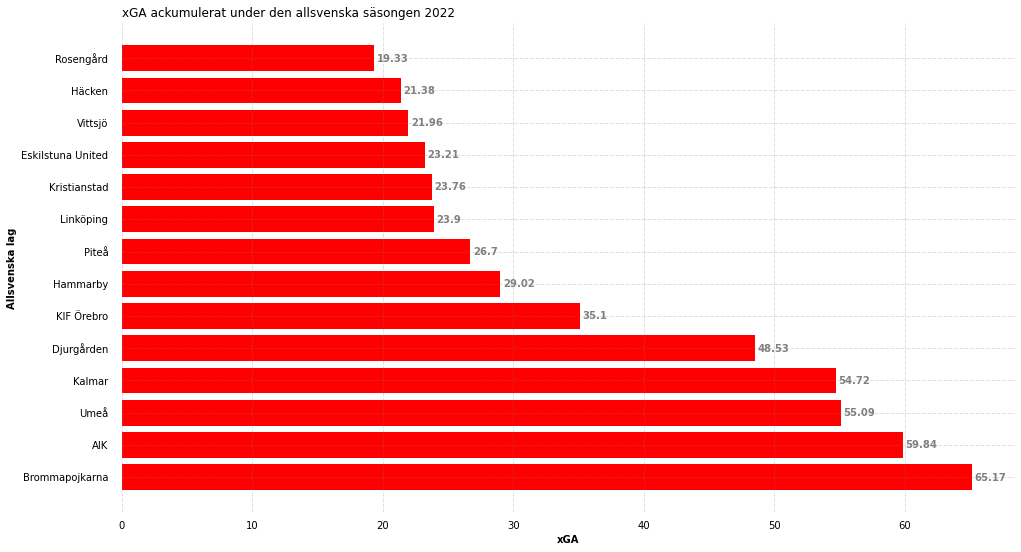

In [4]:
fig, ax = plt.subplots(figsize =(16, 9))
sorted_teamxG = dict(sorted(team_xG.items(), key=lambda x:x[1]))
ax.barh(list(sorted_teamxG.keys()), list(sorted_teamxG.values()), color= 'r')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)
 
# Show top values 
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('xGA ackumulerat under den allsvenska säsongen 2022',
             loc ='left', )
 
# Show Plot
plt.xlabel('xGA', fontweight= 'bold')
plt.ylabel('Allsvenska lag', fontweight= 'bold')
plt.show()